In [1]:
!pip install gradio

     |████████████████████████████████| 668 kB 5.4 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 84 kB 2.5 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 1.1 MB 40.4 MB/s 
     |████████████████████████████████| 211 kB 45.6 MB/s 
     |████████████████████████████████| 2.0 MB 53.6 MB/s 
     |████████████████████████████████| 255 kB 50.9 MB/s 
     |████████████████████████████████| 271 kB 50.0 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 144 kB 59.3 MB/s 
     |████████████████████████████████| 58 kB 3.6 MB/s 
     |████████████████████████████████| 10.9 MB 19.1 MB/s 
     |████████████████████████████████| 79 kB 5.4 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 856 kB 62.9 MB/s 
     |████████████████████████████████| 61 kB 302 kB/s 
     |████████████████████████

In [2]:
import gradio as gr

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


/root/.keras/datasets/flower_photos/roses/16258946661_f9739cdc0a.jpg


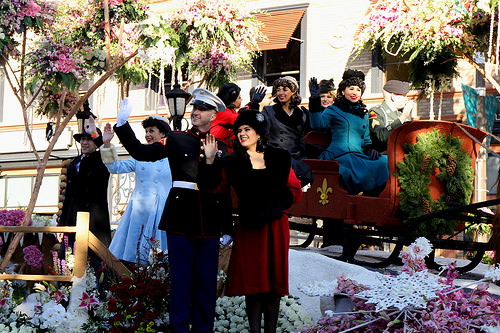

In [5]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [6]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


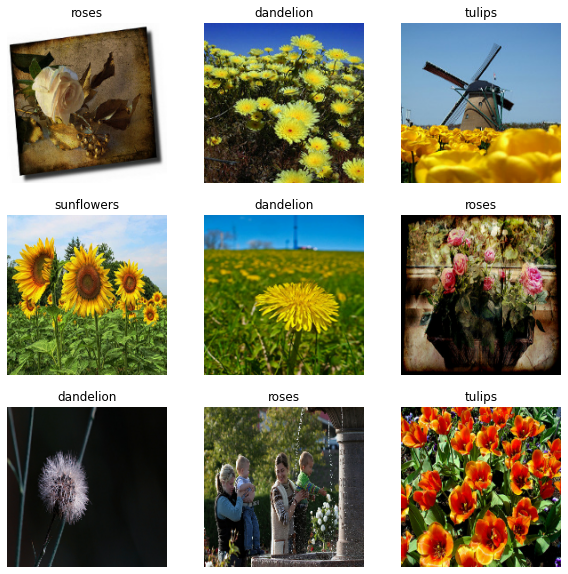

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 97s 1s/step - loss: 1.3175 - accuracy: 0.4550 - val_loss: 1.0876 - val_accuracy: 0.5640
Epoch 2/10
92/92 [==============================] - 96s 1s/step - loss: 0.9647 - accuracy: 0.6216 - val_loss: 1.0142 - val_accuracy: 0.5817
Epoch 3/10
92/92 [==============================] - 95s 1s/step - loss: 0.7803 - accuracy: 0.6982 - val_loss: 0.9669 - val_accuracy: 0.6240
Epoch 4/10
92/92 [==============================] - 95s 1s/step - loss: 0.5614 - accuracy: 0.7963 - val_loss: 1.1120 - val_accuracy: 0.6322
Epoch 5/10
92/92 [==============================] - 95s 1s/step - loss: 0.3420 - accuracy: 0.8774 - val_loss: 1.2967 - val_accuracy: 0.6253
Epoch 6/10
92/92 [==============================] - 99s 1s/step - loss: 0.2166 - accuracy: 0.9257 - val_loss: 1.7485 - val_accuracy: 0.5967
Epoch 7/10
92/92 [==============================] - 97s 1s/step - loss: 0.1427 - accuracy: 0.9605 - val_loss: 1.6081 - val_accuracy: 0.6553
Epoch 8/10
92/92 [=============

In [13]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://16857.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
